In [1]:
#importing required modules
import cifar10
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
#The 10 classes of the dataset
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
# data
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
images_train.shape

(50000, 32, 32, 3)

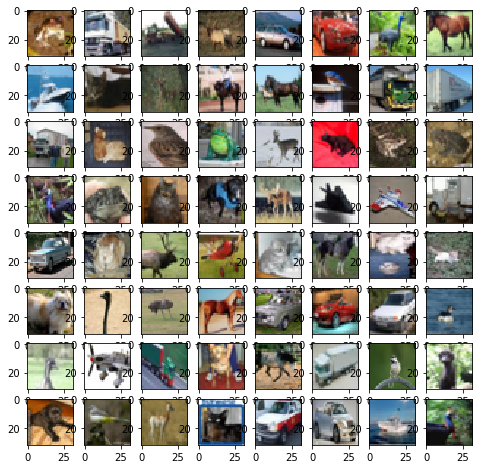

In [7]:
#ploting 64 images for an idea
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i],cmap=plt.cm.bone)
plt.show()

# Applying PCA(Principle Component Analysis)

In [8]:
#reshaping 3d data to apply PCA
x_train = images_train.reshape(images_train.shape[0],-1)
x_test = images_test.reshape(images_test.shape[0], -1)
y_train = cls_train
y_test = cls_test

In [9]:
#applying PCA.fit()
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.explained_variance_ratio_

array([2.90766299e-01, 1.12531437e-01, 6.69441396e-02, ...,
       8.64946450e-09, 8.45232138e-09, 8.33587056e-09])

In [11]:
#Variance set to 0.99 i.e. 99% of the feature information is taken
k = 0
total = 0
while total < 0.99 :
    total += pca.explained_variance_ratio_[k]
    k = k+1
k

658

In [12]:
#PCA Transform
pca_cifar = PCA(n_components = k)
x_transformed = pca_cifar.fit_transform(x_train)
x_transformed.shape

(50000, 658)

In [13]:
#Try to restore (can't restore 100% information back)
x_approx = pca_cifar.inverse_transform(x_transformed)
x_approx = x_approx.reshape(50000,32,32,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

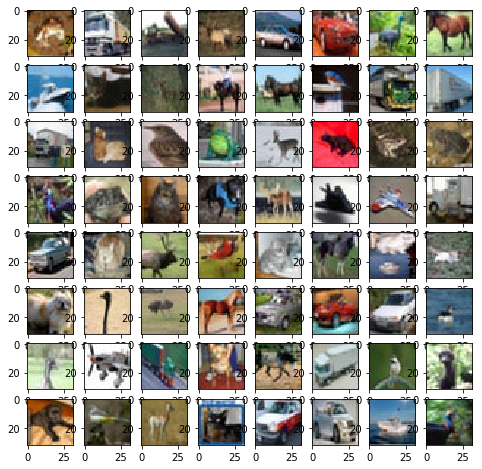

In [14]:
#PLOT
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [15]:
#Transforming X_test to PCA
x_train_pca = x_transformed
x_test_pca = pca_cifar.transform(x_test)

# Eigen Faces

In [16]:
#EigenVectors
pca_cifar.components_.shape
eigenV = pca_cifar.components_.reshape(k,32,32,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

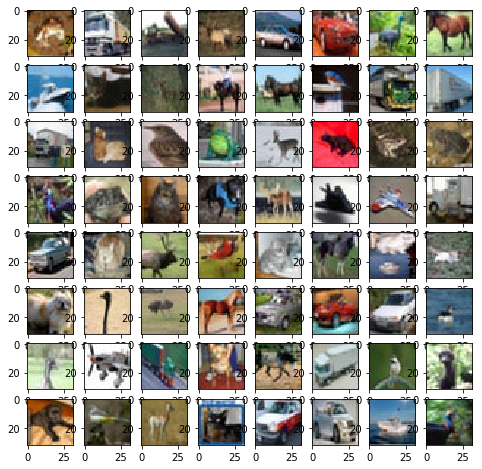

In [17]:
#PLOT
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

# Applying Random Forest Classifier

In [18]:
#Random Forest Classifier and fiting out data
rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
#Making predictions and gettin accuracy of the classifier
y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
random_forest_score

0.2321

In [22]:
#Classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.23      0.40      0.30      1000
           1       0.25      0.33      0.28      1000
           2       0.18      0.24      0.21      1000
           3       0.16      0.18      0.17      1000
           4       0.22      0.22      0.22      1000
           5       0.19      0.15      0.17      1000
           6       0.28      0.22      0.25      1000
           7       0.21      0.13      0.16      1000
           8       0.37      0.28      0.32      1000
           9       0.29      0.17      0.22      1000

   micro avg       0.23      0.23      0.23     10000
   macro avg       0.24      0.23      0.23     10000
weighted avg       0.24      0.23      0.23     10000



# Prediction using KNN

In [23]:
#KNN Classifier
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
##Making predictions and gettin accuracy of the classifier
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

0.3442

# Prediction using Logistic Regression

In [25]:
#Logistic Regression Classifier
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
#Making predictions and gettin accuracy of the classifier
y_pred_lr = lr.predict(x_test_pca)

logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

0.4024

# Prediction using SVM

In [27]:
#SVM Classifier
#THIS CELL WILL TAKE TIME
svc = svm.SVC()
svc.fit(x_train_pca,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
#Making predictions and gettin accuracy of the classifier
y_pred_svm = svc.predict(x_test_pca)

svc_score = accuracy_score(y_test, y_pred_svm)
svc_score

0.4962

In [29]:
#IF WE WANT TO GET PREDICTED CLASS LABEL NAMES 
y_pred_string = []
for i in range(len(y_pred_svm)) :
    y_pred_string.append(class_names[y_pred_svm[i]])

In [30]:
#STORING PREDICTIONS IN A CSV FILE
np.savetxt('y_predict_cifar10.csv', y_pred_string, delimiter=',',fmt = "%s")

# Result : 
## Comparison between various Classifier

In [31]:
#Accuracy score of different Classification algorithms
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)

RandomForestClassifier :  0.2321
K Nearest Neighbors :  0.3442
Logistic Regression :  0.4024
Support Vector Classifier :  0.4962


## Best accuracy comes from Support vector classifier in this project